### SARIMA Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Looking at categories

In [3]:
data = data[['Order Date', 'Category','Sales']]

In [4]:
data.head()

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
2,2016-06-12,Office Supplies,14.6200
3,2015-10-11,Furniture,957.5775
4,2015-10-11,Office Supplies,22.3680


In [5]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [6]:
data.groupby('Category')['Sales'].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Sales, dtype: int64

In [7]:
df = data[data.Category == 'Furniture'].sort_values('Order Date').reset_index(drop = True)
df.drop(['Category'],axis =1, inplace = True)
df.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,545.940
5,2014-01-13,333.999
6,2014-01-14,61.960
7,2014-01-16,127.104
8,2014-01-19,181.470
9,2014-01-20,272.940


### Adding daily sales to get daywise sales for each month

In [8]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


### Setting Order date as index so that we can get month wise average sales

In [9]:
df = df.set_index('Order Date')
df.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [10]:
y = df['Sales'].resample('MS').mean()
y.head(12)

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
Freq: MS, Name: Sales, dtype: float64

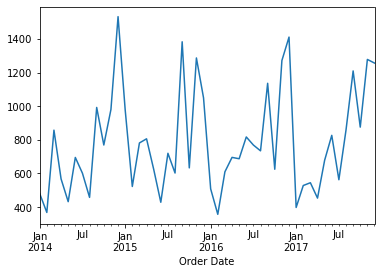

In [11]:
y.plot()

In [12]:
y_train = y[:len(y)-11]
y_test = y[len(y)-11:]

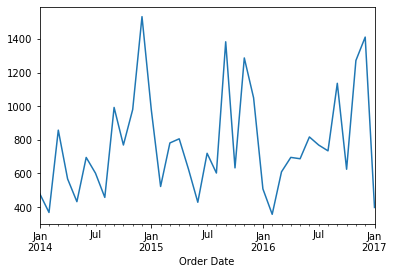

In [13]:
y_train.plot()

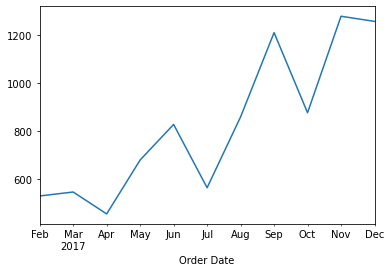

In [14]:
y_test.plot()

### Ad Fuller test to check the stationarity of if we need any transformations

In [15]:
result = adfuller(y_train)
print('ADF Statistic: %f' %result[0])
print('P-value: %f' %result[1])
print('Critical values :')

for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: -3.924040
P-value: 0.001865
Critical values :
	1%: -3.711
	5%: -2.981
	10%: -2.630


### Clearly it shows that the series is stationary and we can apply ARIMA model

...........................ACF and PACF...................

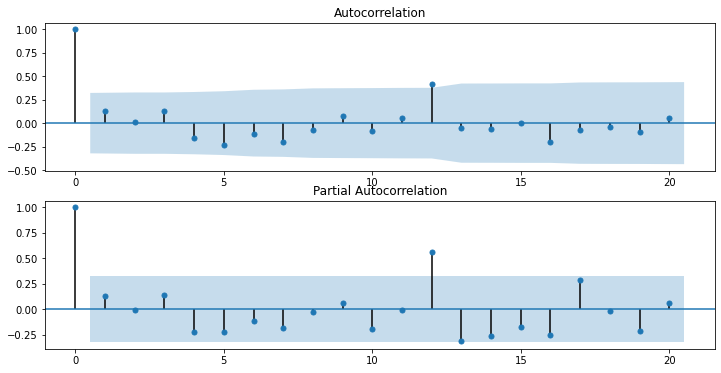

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize = (12,6))
ax[0] = plot_acf(y_train, ax = ax[0], lags = 20)
ax[1] = plot_pacf(y_train, ax = ax[1], lags = 20)

PACF - It is the component of individual lags --- individual contribution to the correlation factor

ACF - It includes the effect of previous lags as well --- Cumulated auto correlation

    - Based on the above plots we are sure thet the series has 12 months seasonality, because any other lag is not significant enough.

### Looking at time series decomposition to see trend, seasonality and residuals

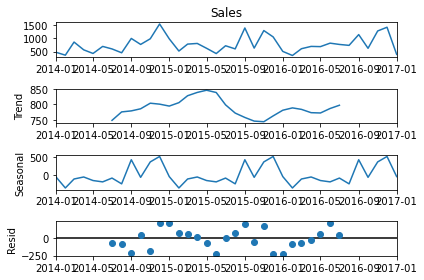

In [17]:
import statsmodels.api as sm
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
ts_decomp.plot()
plt.show()

### Since we have strong seasonality we will use seasonal ARIMA instead of  ARIMA
    - Seasonal ARIMA has 7 parameters:
        - 3 for ARIMA (p,d,q)
        - 4 for seasonal component
        
       4 parameters of seasonal part are again p,d,q and last one is seasonal frequency which        we think is there in the seasonal plot.

In [18]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Example of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[5]))

Example of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
SARIMAX: (0, 1, 1) x (1, 0, 1, 12)


#### Lets create two loops. first for 3 parameters of ARIMA and next 4 parameters for seasonal component for different combinations of p,d,q and P,D,Q and find which combination has lowest AIC value.

In [19]:
metric_aic_dict = dict()
for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y_train,
                                             order = pm,
                                             seasonal_order=pm_seasonal,
                                             enforce_stationarity = False,
                                             enforce_invertibility= False)
            model_aic = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(pm,pm_seasonal,model_aic.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
        
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:588.8073656354634
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:333.42301437135455
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:160.8980325170494
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:352.24508004766125
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:175.38942922952057
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:162.8610955788228
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:550.5783033904554
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1970.4225764561008
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:322.12668247744017
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:149.52864752860737
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:353.8393121893551
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:323.44567636920584
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:176.19800489420766
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:150.0678097976286
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:522.1157354376996
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:338.68913418612385
ARIMA(0, 1, 0)x(0, 1, 0, 12)1

In [20]:
minval = min(metric_aic_dict.values())
res = [k for k, v in metric_aic_dict.items() if v==minval]
res

[((0, 1, 1), (0, 1, 1, 12))]

{k: v for k, v in sorted(metric_aic_dict.items(), key = lambda x: x[1])}

### Now fitting the final model as per the lowest aic

    - model_aic = model.fit()
    - forecast = model_aic.get_prediction
    - predictions = forecast.predicted_mean
    - ci = forecast.conf_int

In [21]:
model = sm.tsa.statespace.SARIMAX(y_train,
                                 order = (0,1,1),
                                 seasonal_order=(0,1,1,12),
                                 enforce_stationarity = False,
                                 enforce_invertibility= False)
model_aic = model.fit()
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      1.273     -0.785      0.432      -3.496       1.496
ma.S.L12      -2.7462      1.554     -1.767      0.077      -5.792       0.300
sigma2      3728.4828      0.000   1.09e+07      0.000    3728.482    3728.483


model_aic.plot_diagnostics(figsize = (16,8))
plt.show()

### Calculating the RMSE

I am using SARIMA model from the statsmodels library to predict(forecast) future values in a time-series. The library contains four methods:
    
    - predict()
    - get_predictions()
    - forecast() 
    - get forecast()

I understand using the methods prefixed with "get_" allows for multistep predictions. 

Forecasting¶:
    - Out-of-sample forecasts are produced using the forecast or get_forecast methods from the            results object.
    - The forecast method gives only point forecasts.
    - Both of the functions forecast and get_forecast accept a single argument indicating how            many forecasting steps are desired. One option for this argument is always to provide an          integer describing the number of steps ahead you want.

In [23]:
forecast = model_aic.get_prediction(start = pd.to_datetime('2017-02-01'), dynamic = False)
# here forecast is result object that has 
    # predicted_mean. ----- The forecasted value in the units of the training time series.
    # mean_se. -------  The standard error for the model.
    # conf_int. ------- The prediction interval for the forecast for a given alpha level.

predictions = forecast.predicted_mean  # prediction
actual = y_test['2017-02-01':]

rmse = np.sqrt((predictions - actual) **2).mean()
print('The root mean squared error of the forecast is {}'.format(round(rmse,2)))

The root mean squared error of the forecast is 111.8


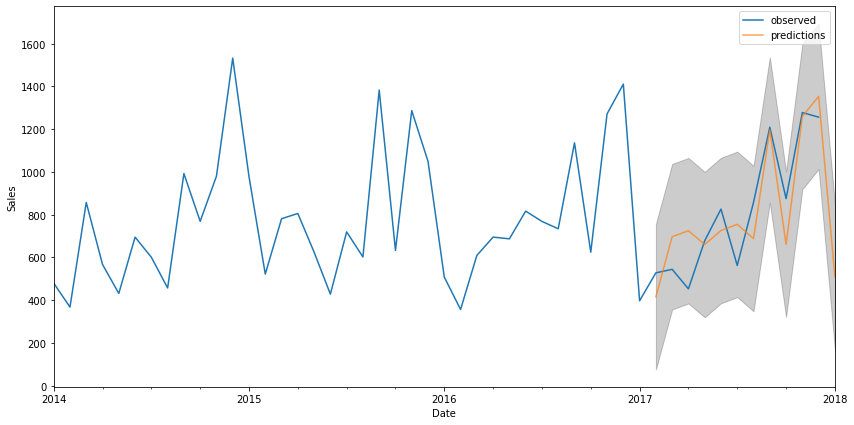

In [24]:
forecast = model_aic.get_forecast(steps = 12)

# predictions and confidence interval
predictions = forecast.predicted_mean
ci = forecast.conf_int()

# observed plot
fig = y.plot(label = 'observed', figsize = (14,7))
fig.set_xlabel('Date')
fig.set_ylabel('Sales')
fig.fill_between(ci.index,
                ci.iloc[:,0],
                ci.iloc[:,1], color = 'k', alpha = .2)

## prediction plot
predictions.plot(ax = fig, label = 'predictions', alpha = 0.7, figsize = (14,7))

plt.legend()
plt.show()